<a href="https://colab.research.google.com/github/koushikroy/image3d/blob/main/image_3d_MRI_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the dataset and Imports

## Downloading data from github

In [1]:
!wget https://github.com/koushikroy/image3d/blob/main/dataset/3d_MRI/cropped_resized_gray.rar?raw=true

--2021-07-30 19:56:47--  https://github.com/koushikroy/image3d/blob/main/dataset/3d_MRI/cropped_resized_gray.rar?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/koushikroy/image3d/raw/main/dataset/3d_MRI/cropped_resized_gray.rar [following]
--2021-07-30 19:56:47--  https://github.com/koushikroy/image3d/raw/main/dataset/3d_MRI/cropped_resized_gray.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/koushikroy/image3d/main/dataset/3d_MRI/cropped_resized_gray.rar [following]
--2021-07-30 19:56:48--  https://raw.githubusercontent.com/koushikroy/image3d/main/dataset/3d_MRI/cropped_resized_gray.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubu

## Unrar

In [2]:
!unrar x "/content/cropped_resized_gray.rar?raw=true" "/content/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/cropped_resized_gray.rar?raw=true

Creating    /content/cropped_resized_gray                             OK
Extracting  /content/cropped_resized_gray/0.png                            1%  OK 
Extracting  /content/cropped_resized_gray/1.png                            3%  OK 
Extracting  /content/cropped_resized_gray/10.png                           4%  OK 
Extracting  /content/cropped_resized_gray/11.png                           6%  OK 
Extracting  /content/cropped_resized_gray/12.png                           7%  OK 
Extracting  /content/cropped_resized_gray/13.png                           9%  OK 
Extracting  /content/cropped_resized_gray/14.png                          10%  OK 
Extracting  /content/cropped_resized_gray/15.png                          11%  OK 
Extracting  /content/cropped_resized_gray/16.png              

## Imports

In [3]:
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt 
import itk
from itkwidgets import view

ModuleNotFoundError: ignored

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.transform import resize
from mpl_toolkits.mplot3d import Axes3D
import zipfile
from io import BytesIO
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage
%matplotlib inline

# Image Processing and Visualizing

In [5]:
plt.rcParams["figure.dpi"] = 200

def normalize(arr):
    arr_min = np.min(arr)
    return (arr-arr_min)/(np.max(arr)-arr_min)


def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

def plot_cube(cube, elev, angle=320):
    cube = normalize(cube)
    
    facecolors = cm.viridis(cube)
    facecolors[:,:,:,-1] = cube
    facecolors = explode(facecolors)
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = fig.gca(projection='3d')
    ax.view_init(elev, angle)
    ax.set_xlim(right=IMG_DIM*2)
    ax.set_ylim(top=IMG_DIM*2)
    ax.set_zlim(top=IMG_DIM*2, bottom=-IMG_DIM*2)
    
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    ax.invert_zaxis()
    plt.show()
    plt.savefig('abc.png')
    
IMG_DIM = 90



*   Collecting all brain MRI images 
*   Stacking them to get a 3d image



In [11]:
im_collection = io.imread_collection('/content/cropped_resized_gray/*.png')
im_3d = im_collection.concatenate()
im_3d.shape

(68, 200, 200)

In [12]:
im_3d = np.stack(im_3d, axis=2)
im_3d.shape

(200, 200, 68)

In [14]:
im_3d_small = im_3d[:,:,:20]
im_3d_small.shape

(200, 200, 20)

In [ ]:
plot_cube(im_3d_small, 0, 90)

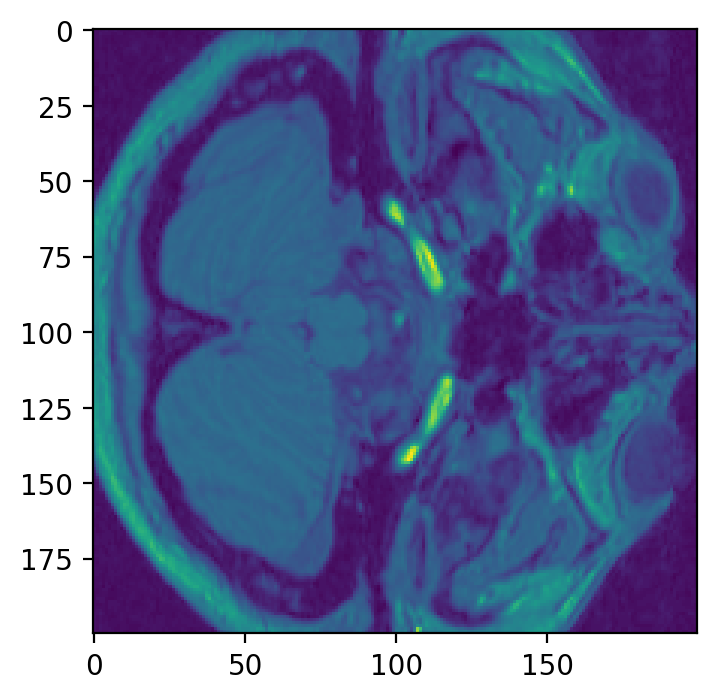

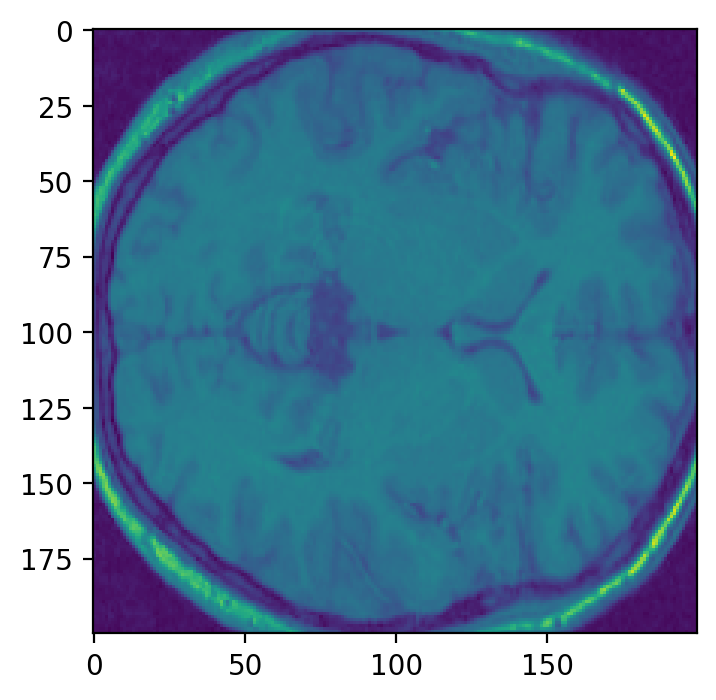

In [13]:
plt.imshow(im_3d[:,:,0])
plt.show()

plt.imshow(im_3d[:,:,25])
plt.show()

ValueError: ignored

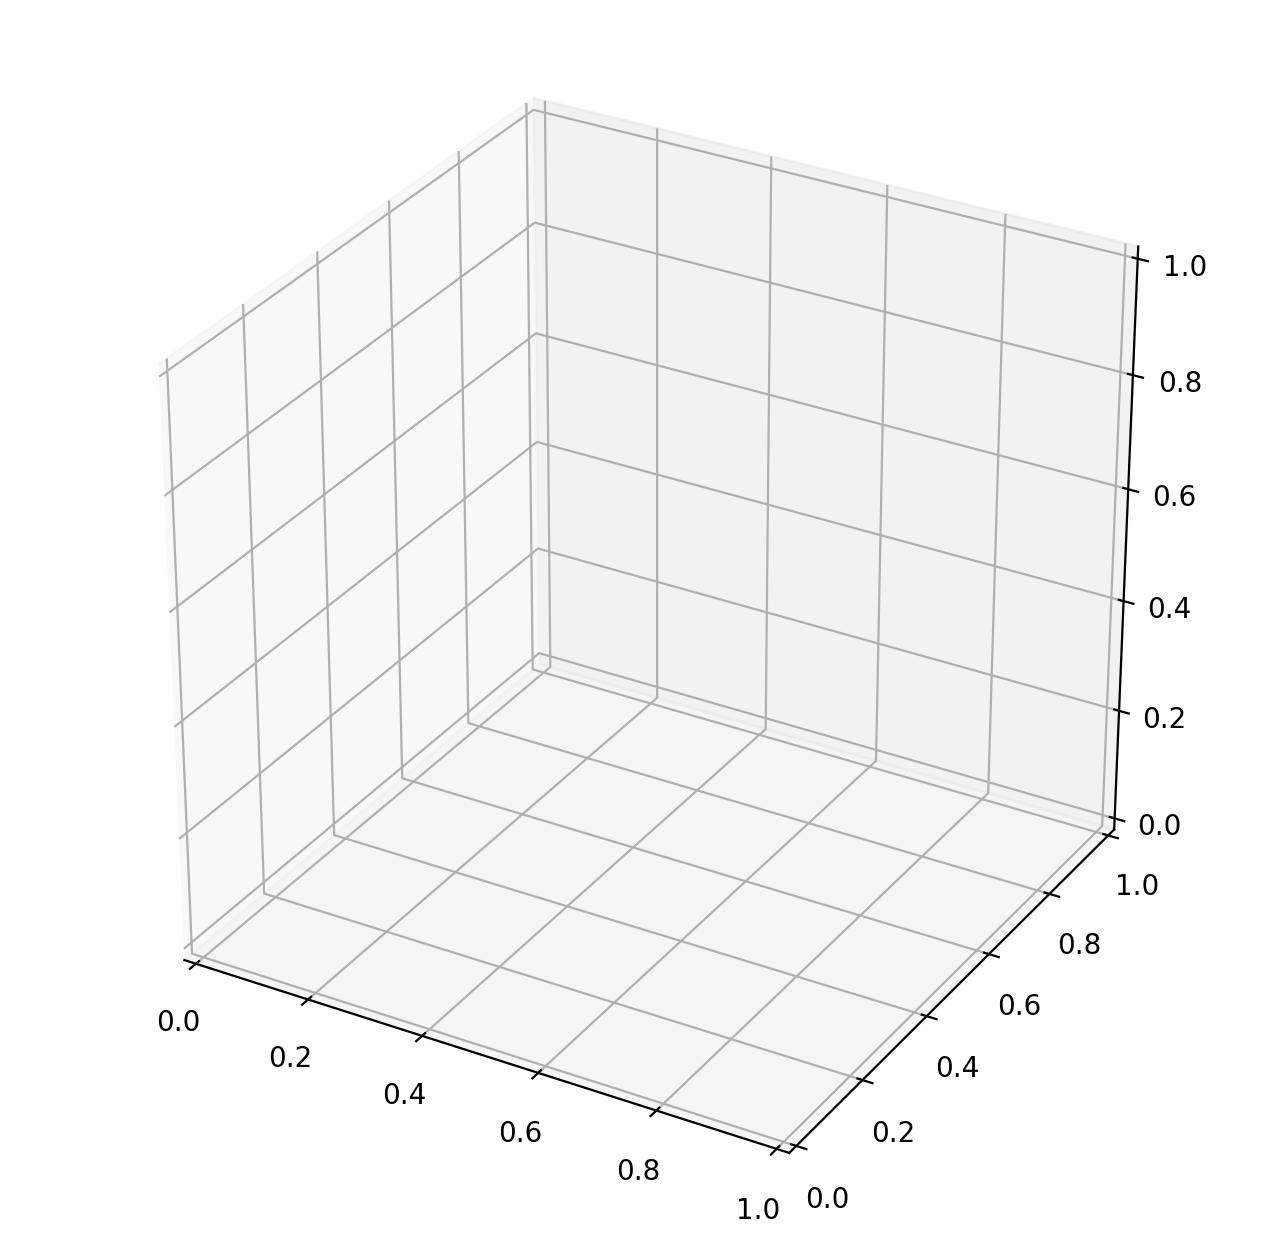

In [15]:
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
 
 
# Creating 3D figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
 
# Creating Dataset
#z = np.linspace(0, 15, 1000)
x = im_3d_small[]
#y = np.cos(z)
ax.plot3D(x, y, z, 'green')
 
# 360 Degree view
angle = 120 # o to 360
ax.view_init(angle, 30)
plt.draw()
#plt.pause(.001)
 
plt.show()

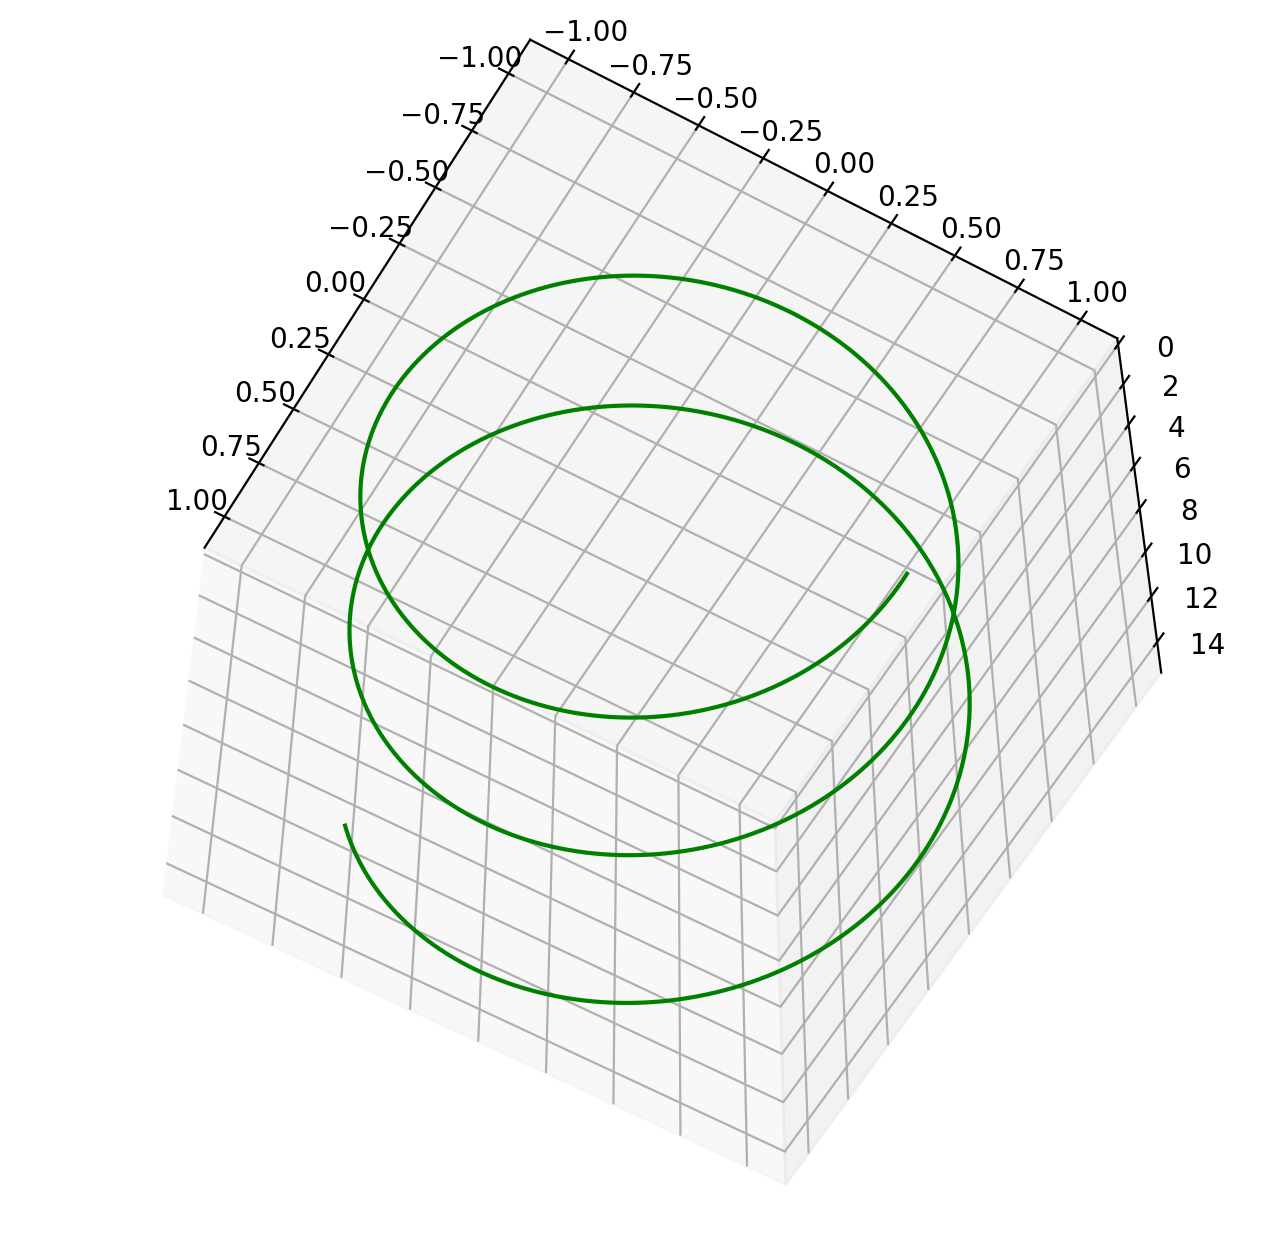

In [14]:
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
 
 
# Creating 3D figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
 
# Creating Dataset
z = np.linspace(0, 15, 1000)
x = np.sin(z)
y = np.cos(z)
ax.plot3D(x, y, z, 'green')
 
# 360 Degree view
angle = 120 # o to 360
ax.view_init(angle, 30)
plt.draw()
#plt.pause(.001)
 
plt.show()